In [6]:
# encoder
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input


In [7]:
# Load data
(trainSamples, trainLabels), (testSamples, testLabels) = tf.keras.datasets.mnist.load_data()

trainSamples = trainSamples.astype('float32') / 255.0
testSamples = testSamples.astype('float32') / 255.0
# Flatten images
trainSamples = trainSamples.reshape(len(trainSamples),-1)
testSamples = testSamples.reshape(len(testSamples),-1)

print(trainSamples.shape)
print(testSamples.shape)
print(trainLabels.shape)


(60000, 784)
(10000, 784)
(60000,)


In [14]:
input_size = 28*28 #784
code_size = 4

input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu')(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

# input_img = Input(shape=(input_size,))
# hidden_1 = Dense(128, activation='relu')(input_img)
# code = Dense(code_size, activation='relu')(hidden_1)
# hidden_2 = Dense(128, activation='relu')(code)
# output_img = Dense(input_size, activation='sigmoid')(hidden_2)


autoencoder = Model(input_img, output_img)

autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(trainSamples, trainSamples, epochs=5)

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_9 (Dense)              (None, 784)               3920      
Total params: 7,060
Trainable params: 7,060
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2500
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2119A: 0s - loss - ETA: 0s - loss: 
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2063
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2037
Epoch 5/5
1875/1875 [==

Original Images


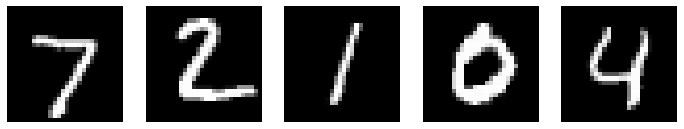

Input layer
Weights: (784, 16)


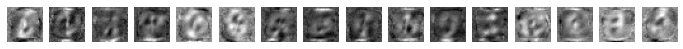

Output layer
Weights: (16, 784)


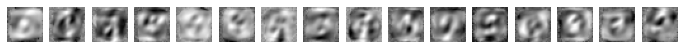

Reconstructed Images


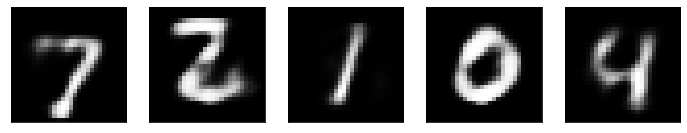

In [12]:
show_weights = True

resultSamples = autoencoder.predict(testSamples)
n = 5
plt.figure(figsize=(12, 12))

print('Original Images')
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(testSamples[i].reshape((28,28)))
    plt.gray()
    plt.axis("off")
plt.show()

if show_weights:
    print("Input layer")
    plt.figure(figsize=(12, 12))
    weights = autoencoder.get_weights()[0].T
    print("Weights:",weights.T.shape)
    size = weights.shape[0]
    for i in range(size):
            ax = plt.subplot(1, size, i + 1)
            plt.imshow(weights[i].reshape((28,28)))
            plt.gray()
            plt.axis("off")
    plt.show()

    print("Output layer")
    plt.figure(figsize=(12, 12))
    weights = autoencoder.get_weights()[2] ## [1]- biases!
    print("Weights:",weights.shape)
    size = weights.shape[0]
    for i in range(size):
            ax = plt.subplot(1, size, i + 1)
            plt.imshow(weights[i].reshape((28,28)))
            plt.gray()
            plt.axis("off")
    plt.show()

plt.figure(figsize=(12, 12))
print('Reconstructed Images')
for i in range(n):
        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(resultSamples[i].reshape((28,28)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()



In [5]:
for i,layer in enumerate(autoencoder.layers):
    print("  ",i, layer.name, type(layer))
    print(autoencoder.get_weights()[i].shape)
print(autoencoder.get_weights()[3].shape)

    

   0 input_1 <class 'tensorflow.python.keras.engine.input_layer.InputLayer'>
(784, 8)
   1 dense <class 'tensorflow.python.keras.layers.core.Dense'>
(8,)
   2 dense_1 <class 'tensorflow.python.keras.layers.core.Dense'>
(8, 784)
(784,)
